In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import random as ran
from keras.datasets import mnist

/Users/jkchang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load MNIST Data
* train_x	60000x784 uint8 (containing 60000 training samples of 28x28 images each linearized into a 1x784 linear vector)
* train_y	60000x10 uint8 (containing 1x10 vectors having labels for the 60000 training samples)
* test_x	10000x784 uint8 (containing 10000 test samples of 28x28 images each linearized into a 1x784 linear vector)
* test_y	10000x10 uint8 (containing 1x10 vectors having labels for the 10000 test samples)

In [2]:
data = mnist.load_data()
print(type(data))

<class 'tuple'>


In [3]:
img_rows, img_clos = 28,28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (np.shape(x_train))
print (np.shape(y_train))
print (np.shape(x_test))
print (np.shape(y_test))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Display the images and its label

In [4]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

7


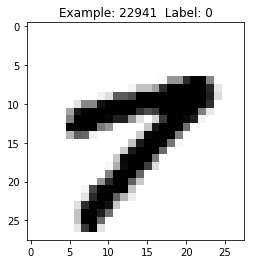

In [5]:
display_digit(ran.randint(0, x_train.shape[0]))

1


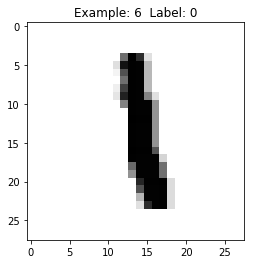

In [6]:
display_digit(6)

In [7]:
def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

In [8]:
# reshape the images [1,784]
start = 0
stop = 60000
images = x_train[start].reshape([1, 784])
for i in range(start + 1, stop):
    images = np.concatenate((images, x_train[i].reshape([1, 784])))

In [9]:
# creat 9 numerical categories
for cate in range(10):
    globals()['image_' + str(cate)] = []

for i in range(60000):
    globals()['image_' + str(y_train[i])].append(images[i])

### mean
calculate mean under each category

In [10]:
for i in range(10):
    globals()['means'+str(i)] = np.mean(globals()['image_'+str(i)],axis=0).reshape(28,28)

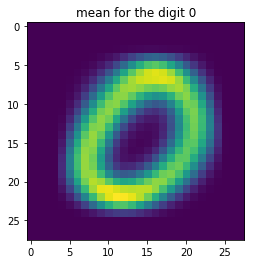

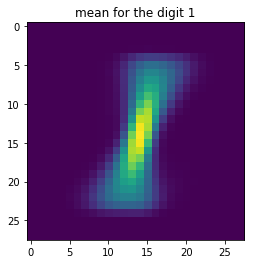

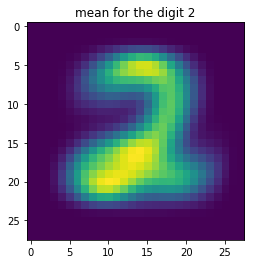

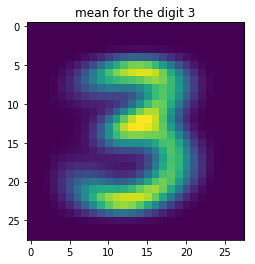

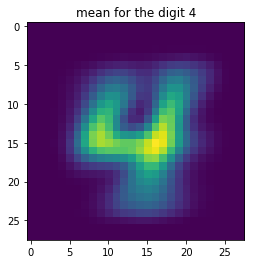

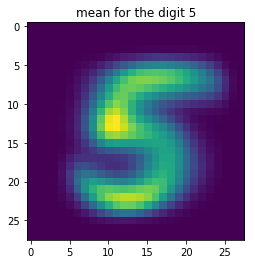

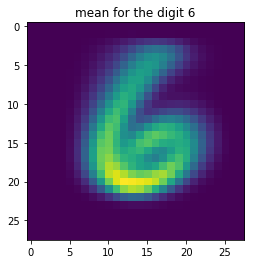

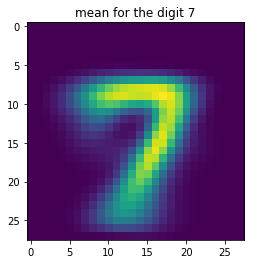

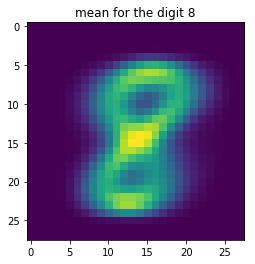

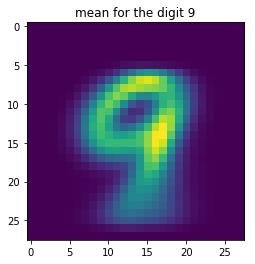

In [11]:
for i in range(10):
    plt.title('mean for the digit %d' %i)
    plt.imshow(globals()['means'+str(i)])
    plt.show()

### Standard deviation

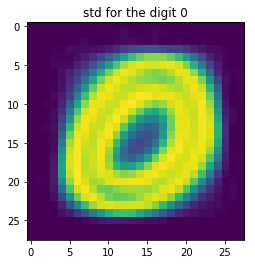

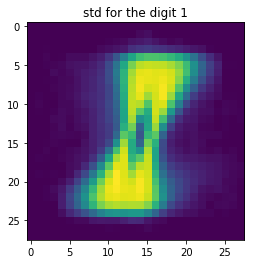

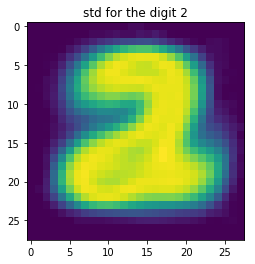

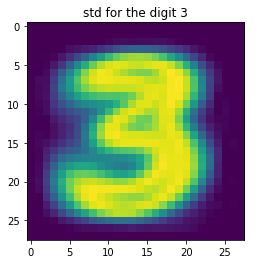

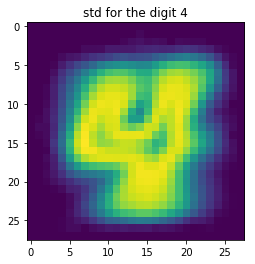

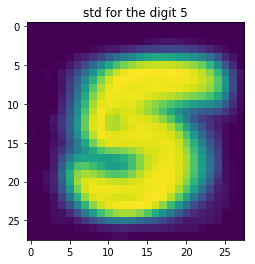

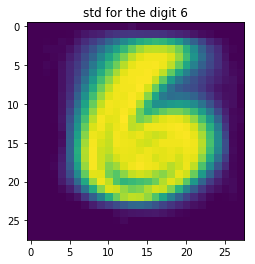

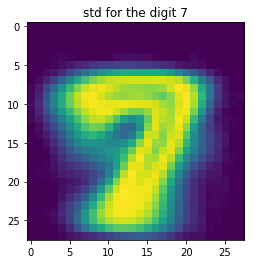

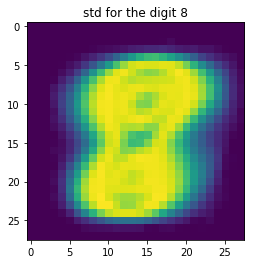

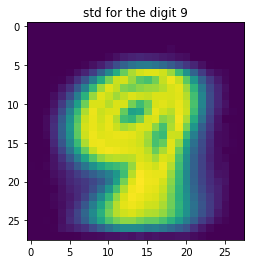

In [12]:
for i in range(10):
    plt.title('std for the digit %d' %i)
    plt.imshow(np.std(globals()['image_'+str(i)],axis=0).reshape(28,28))
    plt.show()

### calculate discriminant funtion
$$gi(x)=−12(x−μi)t∑−1i(x−μi)−d2ln2π−12ln|∑i|+lnP(ωi)$$ 

In [13]:
for i in range(10):
    globals()['sigma_' + str(i)] = np.cov(np.transpose(globals()['image_' + str(i)]))

In [14]:
for i in range(10):
    globals()['sigma_' + str(i) + '_rev'] = np.linalg.pinv(
        globals()['sigma_' + str(i)])

In [15]:
for i in range(10):
    globals()['wi_' + str(i)] = globals()['sigma_' + str(i) + '_rev'].dot(
        np.transpose(globals()['means'+str(i)] .reshape(1, 784)))

In [16]:
# P(wi)
for i in range(10):
    globals()['prior' + str(i)] = np.shape(globals()['image_' + str(i)])[0]/60000
    print(globals()['prior' + str(i)])

0.09871666666666666
0.11236666666666667
0.0993
0.10218333333333333
0.09736666666666667
0.09035
0.09863333333333334
0.10441666666666667
0.09751666666666667
0.09915


In [17]:
x_mean = (x_test[1] - means0).reshape(784,1)
step1 = -(1/2)*(x_mean.T)
step2 = np.matmul(step1,sigma_0_rev)
step3 = np.matmul(step2,x_mean)
g0 = step3 + np.log10(prior0)

In [18]:
g_max = []
test_lable = []
for i in range(10000):
    g_temp = []
    x_mean0 = (x_test[i] - means0).reshape(784,1)
    step1 = -(1/2)*(x_mean0.T)
    step2 = np.matmul(step1,sigma_0_rev)
    step3 = np.matmul(step2,x_mean0)
    g0 = step3 + np.log10(prior0)
    g_temp.append(g0)
    #print("g0th")
    x_mean1 = (x_test[i] - means1).reshape(784,1)
    step1 = -(1/2)*(x_mean1.T)
    step2 = np.matmul(step1,sigma_1_rev)
    step3 = np.matmul(step2,x_mean1)
    g1 = step3 + np.log10(prior1)
    g_temp.append(g1)
    #print("g1th")
    x_mean2 = (x_test[i] - means2).reshape(784,1)
    step1 = -(1/2)*(x_mean2.T)
    step2 = np.matmul(step1,sigma_2_rev)
    step3 = np.matmul(step2,x_mean2)
    g2 = step3 + np.log10(prior2)
    g_temp.append(g2)
    #print("g2th")
    x_mean3 = (x_test[i] - means3).reshape(784,1)
    step1 = -(1/2)*(x_mean3.T)
    step2 = np.matmul(step1,sigma_3_rev)
    step3 = np.matmul(step2,x_mean3)
    g3 = step3 + np.log10(prior3)
    g_temp.append(g3)
    #print("g3")
    x_mean4 = (x_test[i] - means4).reshape(784,1)
    step1 = -(1/2)*(x_mean4.T)
    step2 = np.matmul(step1,sigma_4_rev)
    step3 = np.matmul(step2,x_mean4)
    g4 = step3 + np.log10(prior4)
    g_temp.append(g4)
    #print("g4")
    x_mean5 = (x_test[i] - means5).reshape(784,1)
    step1 = -(1/2)*(x_mean5.T)
    step2 = np.matmul(step1,sigma_5_rev)
    step3 = np.matmul(step2,x_mean5)
    g5 = step3 + np.log10(prior5)
    g_temp.append(g5)
    #print("g5")
    x_mean6 = (x_test[i] - means6).reshape(784,1)
    step1 = -(1/2)*(x_mean6.T)
    step2 = np.matmul(step1,sigma_6_rev)
    step3 = np.matmul(step2,x_mean6)
    g6 = step3 + np.log10(prior6)
    g_temp.append(g6)
    #print("g6")
    x_mean7 = (x_test[i] - means7).reshape(784,1)
    step1 = -(1/2)*(x_mean7.T)
    step2 = np.matmul(step1,sigma_7_rev)
    step3 = np.matmul(step2,x_mean7)
    g7 = step3 + np.log10(prior7)
    g_temp.append(g7)
    #print("g7")
    x_mean8 = (x_test[i] - means8).reshape(784,1)
    step1 = -(1/2)*(x_mean8.T)
    step2 = np.matmul(step1,sigma_8_rev)
    step3 = np.matmul(step2,x_mean8)
    g8 = step3 + np.log10(prior8)
    g_temp.append(g8)
    #print("g8")
    x_mean9 = (x_test[i] - means9).reshape(784,1)
    step1 = -(1/2)*(x_mean9.T)
    step2 = np.matmul(step1,sigma_9_rev)
    step3 = np.matmul(step2,x_mean9)
    g9 = step3 + np.log10(prior9)
    g_temp.append(g9)
    #print("g9")
    maxg = max(g_temp)
    lable = g_temp.index(maxg)
    g_max.append(maxg)
    test_lable.append(lable)
    #print("gmax" , g_max)  

In [19]:
rate_list = y_test - test_lable

In [20]:
correct_rate = 1- np.count_nonzero(rate_list)/10000
correct_rate

0.8571